# <CENTER>HAPPINESS DATASET <CENTER>

Este año se cumple el 10º aniversario del Informe Mundial de la Felicidad, que utiliza datos de encuestas globales para informar cómo las personas evalúan sus propias vidas.

El calculo de la felicidad se realiza mediante encuenstas realizadas a los ciudadanos donde se les pide que piensen en una escala, con la mejor vida posible para ellos siendo un 10, y la peor vida posible siendo un 0. Luego se les pide que califiquen sus propias vidas actuales en esa escala de 0 a 10.
Las columnas que siguen a la puntuación de felicidad (producción económica, apoyo social, esperanza de vida, libertad, ausencia de corrupción y generosidad) no tienen ningún impacto en el puntaje total reportado para cada país, pero sí explican por qué algunos países tienen un rango más alto que otros.

"*Mientras luchamos contra los males de la enfermedad y la guerra, es esencial recordar el deseo universal de felicidad y la capacidad de los individuos para unirse al apoyo mutuo en tiempos de gran necesidad*".

Objetivo: Analizaremos los datos de 148 paises entre los años 2015 a 2019 para obtener respuestas a:
Qué países o regiones ocupan el lugar más alto en felicidad general y cada uno de los seis factores que contribuyen a la felicidad? ¿Cómo cambiaron los rangos o puntajes de los países entre los informes de 2015 y 2019? ¿Algún país experimentó un aumento o disminución significativa de la felicidad?

Para ampliar información: 

https://worldhappiness.report/

https://www.kaggle.com/datasets/mathurinache/world-happiness-report

https://www.gallup.com/home.aspx

## 1. Carga y Preprocesamiento

Librerias

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
import warnings
import geopandas as gpd
from branca.colormap import LinearColormap
import streamlit.components.v1 as components
import plotly.graph_objs as go
import matplotlib.gridspec as gs
import chart_studio.plotly as py
from plotly.offline import iplot, init_notebook_mode



In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

Lectura de los dataset

In [4]:
d15 = pd.read_csv("dataset/2015.csv",sep="[;]",engine="python")
d16 = pd.read_csv("dataset/2016.csv",sep="[;]", engine="python")
d17 = pd.read_csv("dataset/2017.csv",sep="[;]", engine="python")
d18 = pd.read_csv("dataset/2018.csv",sep="[;]", engine="python")
d19 = pd.read_csv("dataset/2019.csv",sep="[;]", engine="python")


In [5]:
d15.shape

(148, 12)

In [6]:
d15.dtypes

Country                          object
Region                           object
Happiness Rank                    int64
Happiness Score                  object
Standard Error                   object
Economy (GDP per Capita)         object
Family                           object
Health (Life Expectancy)         object
Freedom                          object
Trust (Government Corruption)    object
Generosity                       object
Dystopia Residual                object
dtype: object

In [7]:
d15['Happiness Score'] = d15['Happiness Score'].apply(lambda x: x.replace(',','.'))
d15['Economy (GDP per Capita)'] = d15['Economy (GDP per Capita)'].apply(lambda x: x.replace(',','.'))
d15['Family'] = d15['Family'].apply(lambda x: x.replace(',','.'))
d15['Health (Life Expectancy)'] = d15['Health (Life Expectancy)'].apply(lambda x: x.replace(',','.'))
d15['Freedom'] = d15['Freedom'].apply(lambda x: x.replace(',','.'))
d15['Trust (Government Corruption)'] = d15['Trust (Government Corruption)'].apply(lambda x: x.replace(',','.'))
d15['Generosity'] = d15['Generosity'].apply(lambda x: x.replace(',','.'))

In [8]:
d15['Happiness Score'] = d15['Happiness Score'].astype(float)
d15['Economy (GDP per Capita)'] = d15['Economy (GDP per Capita)'].astype(float)
d15['Family'] = d15['Family'].astype(float)
d15['Health (Life Expectancy)'] = d15['Health (Life Expectancy)'].astype(float)
d15['Freedom'] = d15['Freedom'].astype(float)
d15['Trust (Government Corruption)'] = d15['Trust (Government Corruption)'].astype(float)
d15['Generosity'] = d15['Generosity'].astype(float)

In [9]:
d15.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [10]:
d15.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.59,"0,03",1.4,1.35,0.94,0.67,0.42,0.30,"2,52"
1,Iceland,Western Europe,2,7.56,"0,05",1.3,1.40,0.95,0.63,0.14,0.44,"2,7"


In [11]:
d15.tail(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
146,Burundi,Sub-Saharan Africa,157,2.91,"0,09",0.02,0.42,0.22,0.12,0.10,0.20,"1,83"
147,Togo,Sub-Saharan Africa,158,2.84,"0,07",0.21,0.14,0.28,0.36,0.11,0.17,"1,57"


In [12]:
d15.drop(["Happiness Rank", "Standard Error", "Dystopia Residual"] , axis=1, inplace=True)

In [13]:
d15["Year"]=2015

In [14]:
d16.shape

(148, 13)

In [15]:
d16.dtypes

Country                          object
Region                           object
Happiness Rank                    int64
Happiness Score                  object
Lower Confidence Interval        object
Upper Confidence Interval        object
Economy (GDP per Capita)         object
Family                           object
Health (Life Expectancy)         object
Freedom                          object
Trust (Government Corruption)    object
Generosity                       object
Dystopia Residual                object
dtype: object

In [16]:
d16['Happiness Score'] = d16['Happiness Score'].apply(lambda x: x.replace(',','.'))
d16['Economy (GDP per Capita)'] = d16['Economy (GDP per Capita)'].apply(lambda x: x.replace(',','.'))
d16['Family'] = d16['Family'].apply(lambda x: x.replace(',','.'))
d16['Health (Life Expectancy)'] = d16['Health (Life Expectancy)'].apply(lambda x: x.replace(',','.'))
d16['Freedom'] = d16['Freedom'].apply(lambda x: x.replace(',','.'))
d16['Trust (Government Corruption)'] = d16['Trust (Government Corruption)'].apply(lambda x: x.replace(',','.'))
d16['Generosity'] = d16['Generosity'].apply(lambda x: x.replace(',','.'))

In [17]:
d16['Happiness Score'] = d16['Happiness Score'].astype(float)
d16['Economy (GDP per Capita)'] = d16['Economy (GDP per Capita)'].astype(float)
d16['Family'] = d16['Family'].astype(float)
d16['Health (Life Expectancy)'] = d16['Health (Life Expectancy)'].astype(float)
d16['Freedom'] = d16['Freedom'].astype(float)
d16['Trust (Government Corruption)'] = d16['Trust (Government Corruption)'].astype(float)
d16['Generosity'] = d16['Generosity'].astype(float)

In [18]:
d16.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [19]:
d16.head(2)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.53,"7,46","7,59",1.44,1.16,0.80,0.58,0.44,0.36,"2,74"
1,Switzerland,Western Europe,2,7.51,"7,43","7,59",1.53,1.15,0.86,0.59,0.41,0.28,"2,69"


In [20]:
d16.tail(2)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
146,Syria,Middle East and Northern Africa,156,3.07,"2,94","3,2",0.75,0.15,0.63,0.07,0.17,0.48,"0,82"
147,Burundi,Sub-Saharan Africa,157,2.91,"2,73","3,08",0.07,0.23,0.16,0.04,0.09,0.20,"2,1"


In [21]:
d16.drop(["Happiness Rank", "Lower Confidence Interval", "Upper Confidence Interval", "Dystopia Residual"], axis=1, inplace=True)

In [22]:
d16["Year"]=2016

In [23]:
d17.columns

Index(['Country', 'Region', 'Happiness.Rank', 'Happiness.Score',
       'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [24]:
d17.shape

(148, 13)

In [25]:
d17.dtypes

Country                          object
Region                           object
Happiness.Rank                    int64
Happiness.Score                  object
Whisker.high                     object
Whisker.low                      object
Economy..GDP.per.Capita.         object
Family                           object
Health..Life.Expectancy.         object
Freedom                          object
Generosity                       object
Trust..Government.Corruption.    object
Dystopia.Residual                object
dtype: object

In [26]:
##df17["Happiness Score"]= df17["Happiness Score"].astype(float)

In [27]:
d17.head(2)

,Country,Region,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,Western Europe,1,"7,54","7,59","7,48","1,62","1,53","0,8","0,64","0,36","0,32","2,28"
1,Denmark,Western Europe,2,"7,52","7,58","7,46","1,48","1,55","0,79","0,63","0,36","0,4","2,31"


In [28]:
d17.tail(2)

,Country,Region,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
146,Tanzania,Sub-Saharan Africa,153,"3,35","3,46","3,24","0,51","1,04","0,36","0,39","0,35","0,07","0,62"
147,Burundi,Sub-Saharan Africa,154,"2,9","3,07","2,74","0,09","0,63","0,15","0,06","0,2","0,08","1,68"


In [29]:
d17.drop(["Happiness.Rank", "Whisker.high","Whisker.low", "Dystopia.Residual"], axis=1, inplace=True)

In [30]:
d17.rename(columns = {"Happiness.Score":"Happiness Score","Economy..GDP.per.Capita.":"Economy (GDP per Capita)","Health..Life.Expectancy.":"Health (Life Expectancy)", 
"Trust..Government.Corruption.":"Trust (Government Corruption)", "Dystopia.Residual": "Dystopia Residual"} , inplace=True)

In [31]:
d17['Happiness Score'] = d17['Happiness Score'].apply(lambda x: x.replace(',','.'))
d17['Economy (GDP per Capita)'] = d17['Economy (GDP per Capita)'].apply(lambda x: x.replace(',','.'))
d17['Family'] = d17['Family'].apply(lambda x: x.replace(',','.'))
d17['Health (Life Expectancy)'] = d17['Health (Life Expectancy)'].apply(lambda x: x.replace(',','.'))
d17['Freedom'] = d17['Freedom'].apply(lambda x: x.replace(',','.'))
d17['Trust (Government Corruption)'] = d17['Trust (Government Corruption)'].apply(lambda x: x.replace(',','.'))
d17['Generosity'] = d17['Generosity'].apply(lambda x: x.replace(',','.'))

In [32]:
d17['Happiness Score'] = d17['Happiness Score'].astype(float)
d17['Economy (GDP per Capita)'] = d17['Economy (GDP per Capita)'].astype(float)
d17['Family'] = d17['Family'].astype(float)
d17['Health (Life Expectancy)'] = d17['Health (Life Expectancy)'].astype(float)
d17['Freedom'] = d17['Freedom'].astype(float)
d17['Trust (Government Corruption)'] = d17['Trust (Government Corruption)'].astype(float)
d17['Generosity'] = d17['Generosity'].astype(float)

In [33]:
d17["Year"]=2017

In [34]:
d18.shape

(148, 10)

In [35]:
d18.columns

Index(['Overall rank', 'Country or region', 'Region', 'Score',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [36]:
d18.dtypes

Overall rank                      int64
Country or region                object
Region                           object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [37]:
d18.head(2)

,Overall rank,Country or region,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,Western Europe,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,Western Europe,7.594,1.456,1.582,0.861,0.686,0.286,0.340


In [38]:
d18.tail(2)

,Overall rank,Country or region,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
146,154,Sudan,Sub-Saharan Africa,3.254,0.337,0.608,0.177,0.112,0.224,0.106
147,156,Burundi,Sub-Saharan Africa,2.905,0.091,0.627,0.145,0.065,0.149,0.076


In [39]:
d18['Overall rank']

0        1
1        2
2        3
3        4
4        5
      ... 
143    151
144    152
145    153
146    154
147    156
Name: Overall rank, Length: 148, dtype: int64

In [40]:
d18.drop(['Overall rank'], axis=1, inplace=True)

In [41]:
d18.rename(columns = {"Score":"Happiness Score", "Country or region":"Country","GDP per capita":"Economy (GDP per Capita)","Healthy life expectancy":"Health (Life Expectancy)", 
"Perceptions of corruption":"Trust (Government Corruption)", "Freedom to make life choices": "Freedom", "Social support": "Family"} , inplace=True)

In [42]:
d18["Year"]=2018

In [43]:
d19.shape

(148, 10)

In [44]:
d19.columns

Index(['Overall rank', 'Country or region', 'Region', 'Score',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [45]:
d19.head(2)

,Overall rank,Country or region,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,Western Europe,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,Western Europe,7.600,1.383,1.573,0.996,0.592,0.252,0.410


In [46]:
d19.tail(2)

,Overall rank,Country or region,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
146,154,Afghanistan,Southern Asia,3.203,0.350,0.517,0.361,0.00,0.158,0.025
147,156,Sudan,Sub-Saharan Africa,2.853,0.306,0.575,0.295,0.01,0.202,0.091


In [47]:
d19.drop(['Overall rank'], axis=1, inplace=True)

In [48]:
d19.rename(columns = {"Score":"Happiness Score", "Country or region":"Country", "Freedom to make life choices": "Freedom", "GDP per capita":"Economy (GDP per Capita)",
"Healthy life expectancy":"Health (Life Expectancy)", "Perceptions of corruption":"Trust (Government Corruption)", "Social support": "Family"} , inplace=True)

In [49]:
d19["Year"]=2019

# 2. Limpieza dataset

In [50]:
d15.isnull().sum().sum()

0

In [51]:
d16.isnull().sum().sum()

0

In [52]:
d17.isnull().sum().sum()

0

In [53]:
d18.isnull().sum()


Country                          0
Region                           0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Generosity                       0
Trust (Government Corruption)    1
Year                             0
dtype: int64

In [54]:
d18["Trust (Government Corruption)"]=d18["Trust (Government Corruption)"].fillna(d18["Trust (Government Corruption)"].mean())

In [55]:
d19.isnull().sum().sum()

0

Pasar dataset limpio a csv

In [56]:
d15.to_csv("2015.csv")
d16.to_csv("2016.csv")
d17.to_csv("2017.csv")
d18.to_csv("2018.csv")
d19.to_csv("2019.csv")

Dejarlo listo para streamlit

In [57]:
df155 = pd.read_csv("2015.csv",sep="[,]",engine="python")
df165 = pd.read_csv("2016.csv",sep="[,]",engine="python")
df175 = pd.read_csv("2017.csv",sep="[,]",engine="python")
df185 = pd.read_csv("2018.csv",sep="[,]",engine="python")
df195 = pd.read_csv("2019.csv",sep="[,]",engine="python")

In [58]:
df15=df155.drop(["Unnamed: 0"], axis=1, inplace=True)
df16=df165.drop(["Unnamed: 0"], axis=1, inplace=True)
df17=df175.drop(["Unnamed: 0"], axis=1, inplace=True)
df18=df185.drop(["Unnamed: 0"], axis=1, inplace=True)
df19=df195.drop(["Unnamed: 0"], axis=1, inplace=True)

In [59]:
df15=df155
df16=df165
df17=df175
df18=df185
df19=df195

# *Año 2015*

## 1. Análisis normalidad y correlación

In [60]:
from scipy.stats import shapiro

In [61]:
test_norm = shapiro(df15["Happiness Score"])
print(f"El p-valor obtenido en el test de Shapiro es de {test_norm.pvalue}")

El p-valor obtenido en el test de Shapiro es de 0.03414018079638481


C:\Users\fara1\AppData\Local\Temp\ipykernel_20288\134001680.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='Happiness Score', ylabel='Density'>

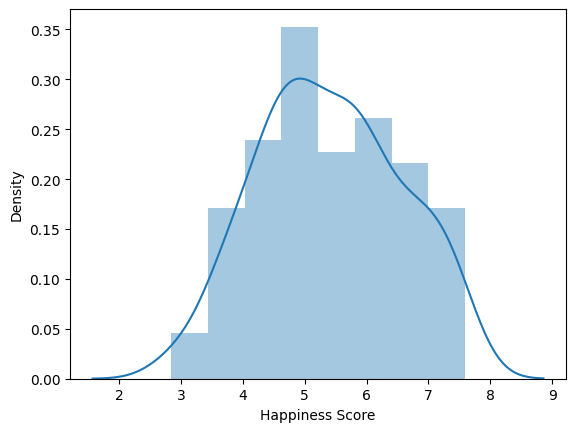

In [62]:
sns.distplot(df15["Happiness Score"])

C:\Users\fara1\AppData\Local\Temp\ipykernel_20288\1020750537.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot: >

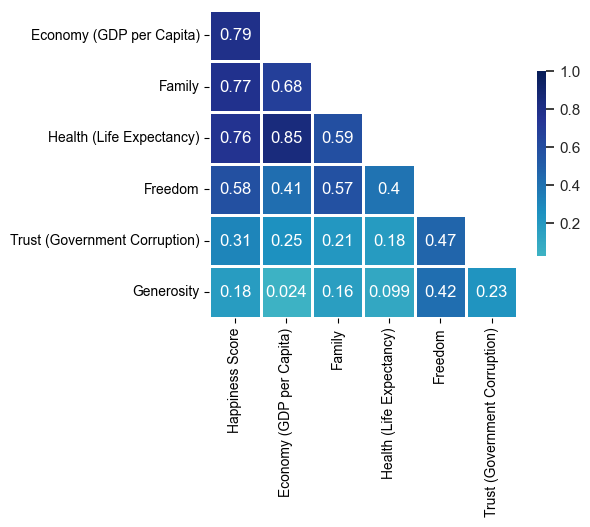

In [63]:

corr = df15.corr(method = 'spearman').sort_values(by = 'Happiness Score', axis = 0, ascending = False).sort_values(by = 'Happiness Score', axis = 1, ascending = False)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool)) # tri u o tri l para cambiar la forma
 # Set up the matplotlib figure
fig15, ax15 = plt.subplots(figsize=(5,4))
 # Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 # Draw the heatmap with the mask and correct aspect ratio
sns.set()
sns.heatmap(corr.iloc[1:7,0:6], mask=mask[1:7,0:6], cmap="YlGnBu", vmax=1, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .6}, annot = True)


## 2. Análisis Happiness Report

Top 5 paises más y menos felices

In [64]:
top15=df15.sort_values(by="Happiness Score", ascending=False).head()
notop15=df15.sort_values(by="Happiness Score", ascending=False).tail()

In [65]:
topfelices15 =px.histogram(top15,x="Happiness Score", y="Country", color= "Happiness Score", width=800, title="Top 5 países más felices")
topfelices15.show()


In [66]:
topnofelices15 =px.histogram(notop15,x="Happiness Score", y="Country", color= "Happiness Score", width=800, title="Top 5 países menos felices")
topnofelices15.show()

Regiones felicidad

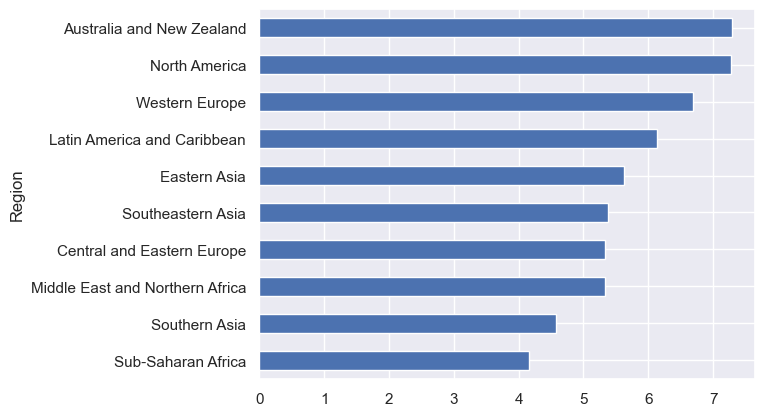

In [67]:
data = df15.groupby(by='Region').mean()['Happiness Score'].sort_values()
fig0 = data.plot.barh(rot=0)

In [68]:
region_lists=list(df15['Region'].unique())
region_happiness_ratio=[]
for each in region_lists:
    region=df15[df15['Region']==each]
    region_happiness_rate=sum(region["Happiness Score"])/len(region)
    region_happiness_ratio.append(region_happiness_rate)
    
data_happiness=pd.DataFrame({'region':region_lists,'region_happiness_ratio':region_happiness_ratio})
new_index_happiness=(data_happiness['region_happiness_ratio'].sort_values(ascending=False)).index.values
sorted_data_happiness = data_happiness.reindex(new_index_happiness)
sorted_data_happiness=sorted_data_happiness.round(2)
sorted_data_happiness

,region,region_happiness_ratio
2,Australia and New Zealand,7.28
1,North America,7.28
0,Western Europe,6.69
4,Latin America and Caribbean,6.14
7,Eastern Asia,5.62
5,Southeastern Asia,5.37
6,Central and Eastern Europe,5.33
3,Middle East and Northern Africa,5.33
9,Southern Asia,4.58
8,Sub-Saharan Africa,4.16


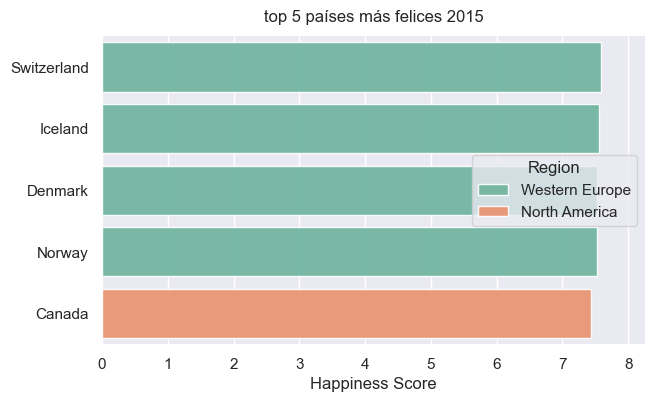

In [69]:

plt.figure(figsize=(7,4))
g = sns.barplot(data=top15, x='Happiness Score', y='Country', alpha=0.95, 
                hue='Region', dodge=False,
                palette='Set2')
g.set_title('top 5 países más felices 2015', y=1.02)
g.set(xlabel='Happiness Score',
      ylabel=None)
g.set_xlim(0, 8.25)
sns.despine(left=True, bottom=True, top=True)

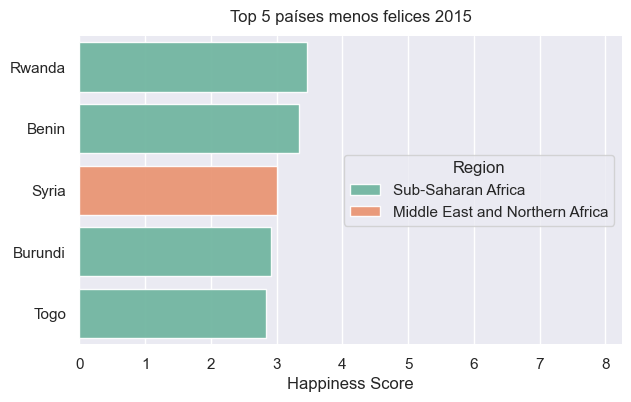

In [70]:
plt.figure(figsize=(7,4))
g = sns.barplot(data=notop15, x='Happiness Score', y='Country', alpha=0.95, 
                hue='Region', dodge=False,
                palette='Set2')
g.set_title('Top 5 países menos felices 2015', y=1.02)
g.set(xlabel='Happiness Score',
      ylabel=None)
g.set_xlim(0, 8.25)
sns.despine(left=True, bottom=True, top=True)

Mapa

In [71]:
dfmap15 = px.data.gapminder()
figmap15 = px.choropleth(df15, locations="Country",locationmode="country names", color="Happiness Score", hover_name="Country")
figmap15.show()

In [72]:
figregion15 = px.bar(        
        df15,
        x = "Region",
        y = "Happiness Score",
        title = "Happiness Score por Región",
        color="Happiness Score")
figregion15

Factores por paises

In [73]:
factorstop = df15.iloc[:,:]
        # Creating trace1
trace1 = go.Scatter(x = df15['Country'],
                    y = df15['Economy (GDP per Capita)'],
                    mode = "lines+markers",
                    name = "Economy",
                    marker = dict(color = 'red'),
                    text= df15.Country)

        # Creating trace2
trace2 = go.Scatter(x = df15['Country'],
                    y = df15['Health (Life Expectancy)'],
                    mode = "lines+markers",
                    name = "Health (Life Expectancy)",
                    marker = dict(color = 'blue'),
                    text= df15.Country)

        # Creating trace3
trace3 = go.Scatter(x = df15['Country'],
                    y = df15['Family'],
                    mode = "lines+markers",
                    name = "Family",
                    marker = dict(color = 'grey'),
                    text= df15.Country)

        # Creating trace4
trace4 = go.Scatter(x = df15['Country'],
                    y = df15["Freedom"],
                    mode = "lines+markers",
                    name = "Freedom",
                    marker = dict(color = 'black'),
                    text= df15.Country)

       
data = [trace1, trace2, trace3, trace4]
layout = dict(title = 'Comparación amplia factores más correlacionados 2015',
              xaxis= dict(title= 'Countries',ticklen= 4,zeroline= False),
              hovermode="x unified")
figfactores15 = dict(data = data,layout = layout)

iplot(figfactores15)

In [74]:
#BEN HERBERTSON kaggle. world happiness report

<AxesSubplot: xlabel='Health (Life Expectancy)', ylabel='Country'>

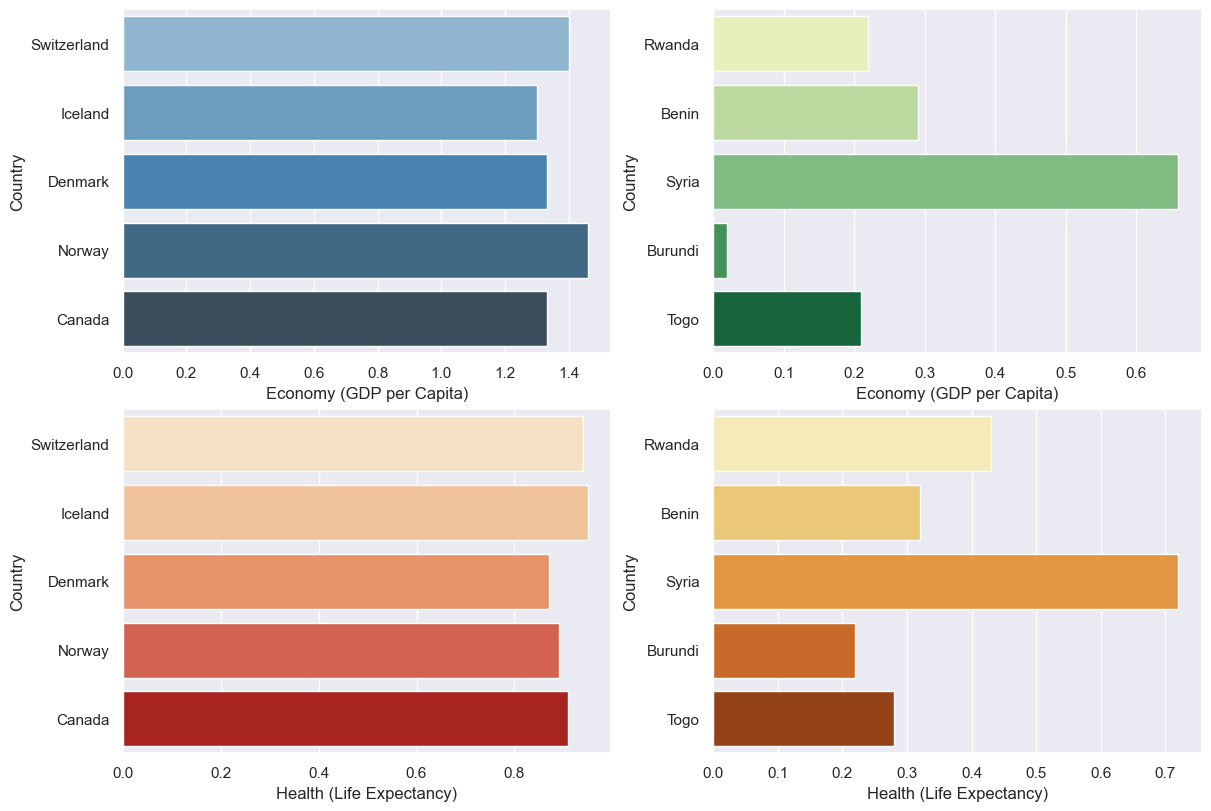

In [75]:
fig00, axes00 = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='Economy (GDP per Capita)',y='Country', data=top15, ax=axes00[0,0],palette="Blues_d")

sns.barplot(x='Economy (GDP per Capita)' ,y='Country', data=notop15, ax=axes00[0,1],palette="YlGn")

sns.barplot(x='Health (Life Expectancy)' ,y='Country', data=top15, ax=axes00[1,0],palette='OrRd')

sns.barplot(x='Health (Life Expectancy)' ,y='Country', data=notop15, ax=axes00[1,1],palette='YlOrBr')

<AxesSubplot: xlabel='Freedom', ylabel='Country'>

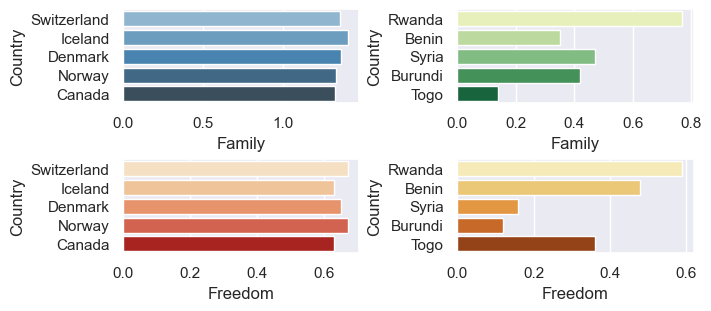

In [76]:
fig001, axes001 = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(7,3))

sns.barplot(x='Family',y='Country', data=top15, ax=axes001[0,0],palette="Blues_d")

sns.barplot(x='Family' ,y='Country', data=notop15, ax=axes001[0,1],palette="YlGn")

sns.barplot(x='Freedom' ,y='Country', data=top15, ax=axes001[1,0],palette='OrRd')

sns.barplot(x='Freedom' ,y='Country', data=notop15, ax=axes001[1,1],palette='YlOrBr')

# *Año 2016*

## 1. Análisis normalidad y correlación

In [77]:
test_norm = shapiro(df16["Happiness Score"])
print(f"El p-valor obtenido en el test de Shapiro es de {test_norm.pvalue}")

El p-valor obtenido en el test de Shapiro es de 0.02102232351899147


C:\Users\fara1\AppData\Local\Temp\ipykernel_20288\4069950131.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='Happiness Score', ylabel='Density'>

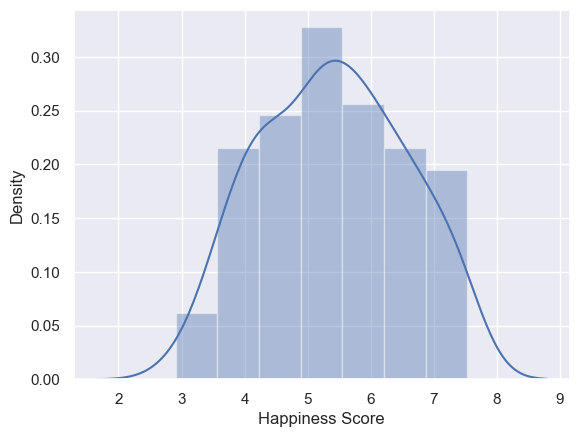

In [78]:
sns.distplot(df16["Happiness Score"])

C:\Users\fara1\AppData\Local\Temp\ipykernel_20288\2890381178.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot: >

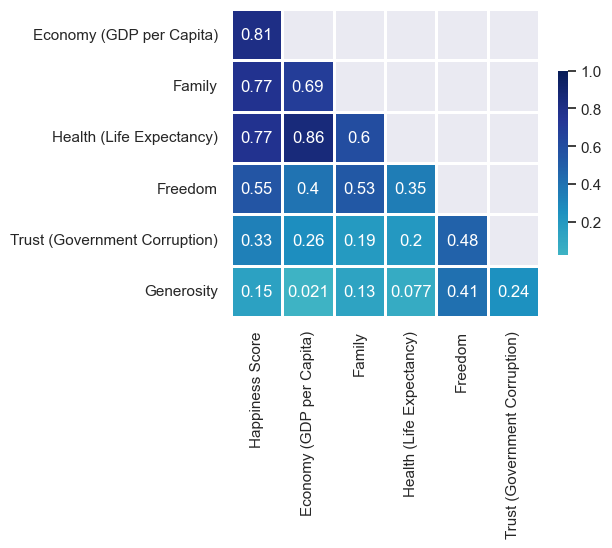

In [79]:
corr = df16.corr(method = 'spearman').sort_values(by = 'Happiness Score', axis = 0, ascending = False).sort_values(by = 'Happiness Score', axis = 1, ascending = False)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool)) # tri u o tri l para cambiar la forma
 # Set up the matplotlib figure
fig16, ax16 = plt.subplots(figsize=(5,4))
 # Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 # Draw the heatmap with the mask and correct aspect ratio
sns.set()
sns.heatmap(corr.iloc[1:7,0:6], mask=mask[1:7,0:6], cmap="YlGnBu", vmax=1, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .6}, annot = True)

## 2. Análisis Happiness Report

In [81]:
top16=df16.sort_values(by="Happiness Score", ascending=False).head()
notop16=df16.sort_values(by="Happiness Score", ascending=False).tail()

In [82]:
topfelices16 =px.histogram(top16,x="Happiness Score", y="Country", color= "Happiness Score", width=800, title="Top 5 países más felices")
topfelices16.show()

In [83]:
topnofelices16 =px.histogram(notop16,x="Happiness Score", y="Country", color= "Happiness Score", width=800, title="Top 5 países menos felices")
topnofelices16.show()

<AxesSubplot: ylabel='Region'>

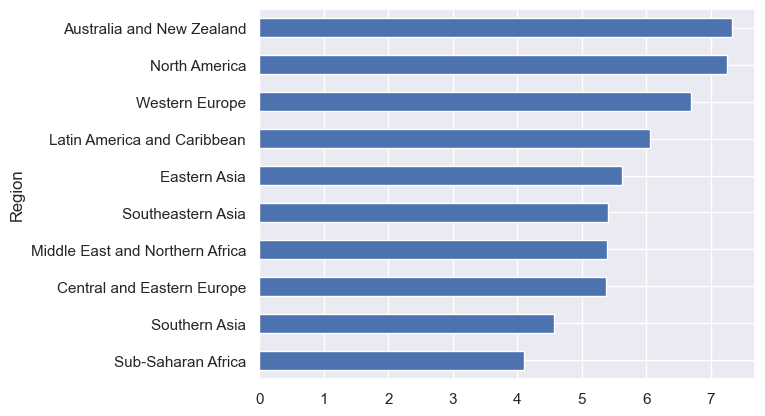

In [81]:
df16.groupby(by='Region').mean()['Happiness Score'].sort_values().plot(kind='barh')

In [82]:
region_lists=list(df16['Region'].unique())
region_happiness_ratio=[]
for each in region_lists:
    region=df16[df16['Region']==each]
    region_happiness_rate=sum(region["Happiness Score"])/len(region)
    region_happiness_ratio.append(region_happiness_rate)
    
data_happiness=pd.DataFrame({'region':region_lists,'region_happiness_ratio':region_happiness_ratio})
new_index_happiness=(data_happiness['region_happiness_ratio'].sort_values(ascending=False)).index.values
sorted_data_happiness = data_happiness.reindex(new_index_happiness)
sorted_data_happiness=sorted_data_happiness.round(2)
sorted_data_happiness

,region,region_happiness_ratio
2,Australia and New Zealand,7.32
1,North America,7.25
0,Western Europe,6.69
4,Latin America and Caribbean,6.06
7,Eastern Asia,5.63
5,Southeastern Asia,5.40
3,Middle East and Northern Africa,5.39
6,Central and Eastern Europe,5.37
9,Southern Asia,4.56
8,Sub-Saharan Africa,4.11


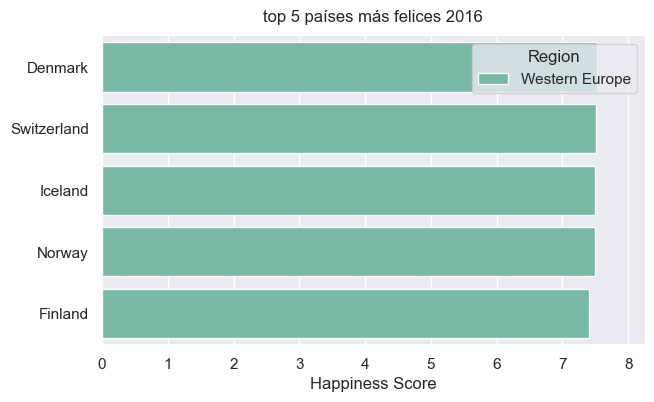

In [83]:


plt.figure(figsize=(7,4))
g = sns.barplot(data=top16, x='Happiness Score', y='Country', alpha=0.95, 
                hue='Region', dodge=False,
                palette='Set2')
g.set_title('top 5 países más felices 2016', y=1.02)
g.set(xlabel='Happiness Score',
      ylabel=None)
g.set_xlim(0, 8.25)
sns.despine(left=True, bottom=True, top=True)

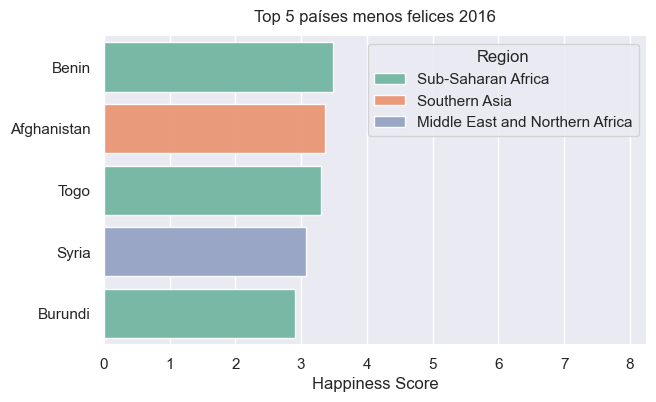

In [84]:


plt.figure(figsize=(7,4))
g = sns.barplot(data=notop16, x='Happiness Score', y='Country', alpha=0.95, 
                hue='Region', dodge=False,
                palette='Set2')
g.set_title('Top 5 países menos felices 2016', y=1.02)
g.set(xlabel='Happiness Score',
      ylabel=None)
g.set_xlim(0, 8.25)
sns.despine(left=True, bottom=True, top=True)

In [85]:
dfmap16 = px.data.gapminder()
figmap16 = px.choropleth(df16, locations="Country",locationmode="country names", color="Happiness Score", hover_name="Country")
figmap16.show()

In [86]:
figregion16 = px.bar(        
        df16,
        x = "Region",
        y = "Happiness Score",
        title = "Happiness Score por Región",
        color="Happiness Score")
figregion16

In [87]:
factorstop = df16.iloc[:,:]
        # Creating trace1
trace1 = go.Scatter(x = df16['Country'],
                    y = df16['Economy (GDP per Capita)'],
                    mode = "lines+markers",
                    name = "Economy",
                    marker = dict(color = 'red'),
                    text= df16.Country)

        # Creating trace2
trace2 = go.Scatter(x = df16['Country'],
                    y = df16['Health (Life Expectancy)'],
                    mode = "lines+markers",
                    name = "Health (Life Expectancy)",
                    marker = dict(color = 'blue'),
                    text= df16.Country)

        # Creating trace3
trace3 = go.Scatter(x = df16['Country'],
                    y = df16['Family'],
                    mode = "lines+markers",
                    name = "Family",
                    marker = dict(color = 'grey'),
                    text= df16.Country)

        # Creating trace4
trace4 = go.Scatter(x = df16['Country'],
                    y = df16["Freedom"],
                    mode = "lines+markers",
                    name = "Freedom",
                    marker = dict(color = 'black'),
                    text= df16.Country)

       
data = [trace1, trace2, trace3, trace4]
layout = dict(title = 'Comparación amplia factores más correlacionados 2015',
              xaxis= dict(title= 'Countries',ticklen= 4,zeroline= False),
              hovermode="x unified")
figfactores16 = dict(data = data,layout = layout)

iplot(figfactores16)

<AxesSubplot: xlabel='Health (Life Expectancy)', ylabel='Country'>

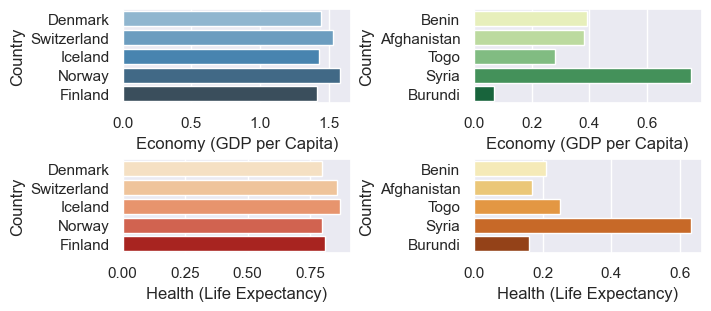

In [88]:

fig01, axes01 = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(7,3))
sns.barplot(x='Economy (GDP per Capita)',y='Country', data=top16, ax=axes01[0,0],palette="Blues_d")
sns.barplot(x='Economy (GDP per Capita)' ,y='Country', data=notop16, ax=axes01[0,1],palette="YlGn")
sns.barplot(x='Health (Life Expectancy)' ,y='Country', data=top16, ax=axes01[1,0],palette='OrRd')
sns.barplot(x='Health (Life Expectancy)' ,y='Country', data=notop16, ax=axes01[1,1],palette='YlOrBr')


<AxesSubplot: xlabel='Freedom', ylabel='Country'>

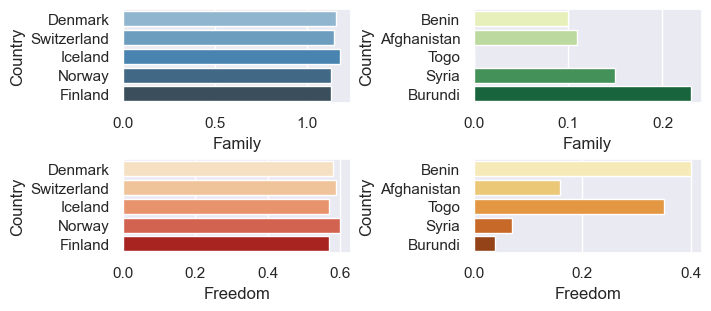

In [89]:
fig011, axes011 = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(7,3))
sns.barplot(x='Family',y='Country', data=top16, ax=axes011[0,0],palette="Blues_d")
sns.barplot(x='Family' ,y='Country', data=notop16, ax=axes011[0,1],palette="YlGn")
sns.barplot(x='Freedom' ,y='Country', data=top16, ax=axes011[1,0],palette='OrRd')
sns.barplot(x='Freedom' ,y='Country', data=notop16, ax=axes011[1,1],palette='YlOrBr')


# *Año 2017*


## 1. Análisis normalidad y correlación

In [90]:
test_norm = shapiro(df17["Happiness Score"])
print(f"El p-valor obtenido en el test de Shapiro es de {test_norm.pvalue}")

El p-valor obtenido en el test de Shapiro es de 0.0394955649971962


C:\Users\fara1\AppData\Local\Temp\ipykernel_15364\17304180.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='Happiness Score', ylabel='Density'>

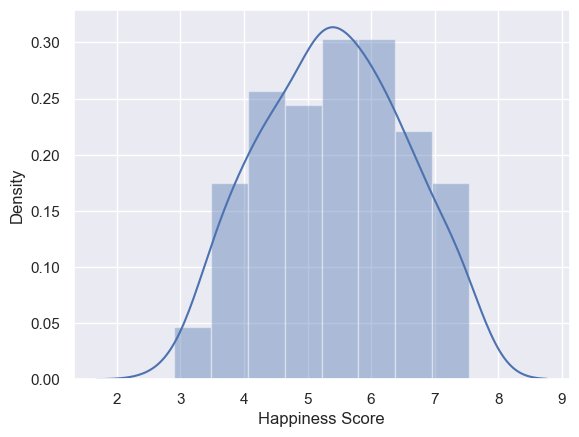

In [91]:
sns.distplot(df17["Happiness Score"])

C:\Users\fara1\AppData\Local\Temp\ipykernel_15364\1124873946.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot: >

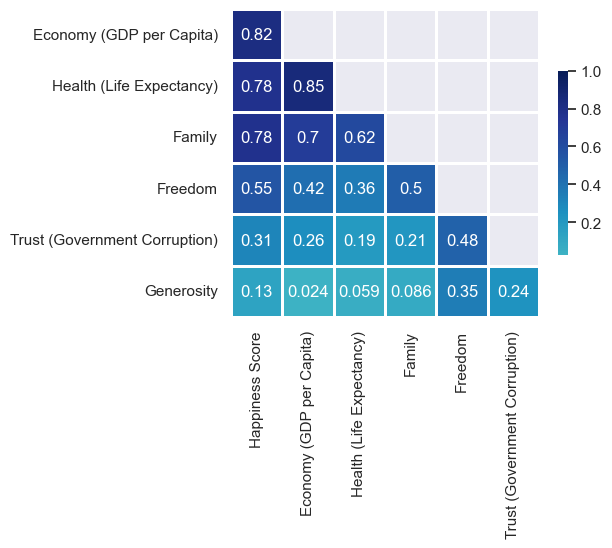

In [92]:
corr = df17.corr(method = 'spearman').sort_values(by = 'Happiness Score', axis = 0, ascending = False).sort_values(by = 'Happiness Score', axis = 1, ascending = False)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool)) # tri u o tri l para cambiar la forma
 # Set up the matplotlib figure
fig17, ax17 = plt.subplots(figsize=(5,4))
 # Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 # Draw the heatmap with the mask and correct aspect ratio
sns.set()
sns.heatmap(corr.iloc[1:7,0:6], mask=mask[1:7,0:6], cmap="YlGnBu", vmax=1, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .6}, annot = True)

## 2. Análisis Happiness Report

In [84]:
top17=df17.sort_values(by="Happiness Score", ascending=False).head()
notop17=df17.sort_values(by="Happiness Score", ascending=False).tail()

In [93]:
topfelices17 =px.histogram(top17,x="Happiness Score", y="Country", color= "Happiness Score", width=800, title="Top 5 países más felices")
topfelices17.show()

In [94]:
topnofelices17 =px.histogram(notop17,x="Happiness Score", y="Country", color= "Happiness Score", width=800, title="Top 5 países menos felices")
topnofelices17.show()

<AxesSubplot: ylabel='Region'>

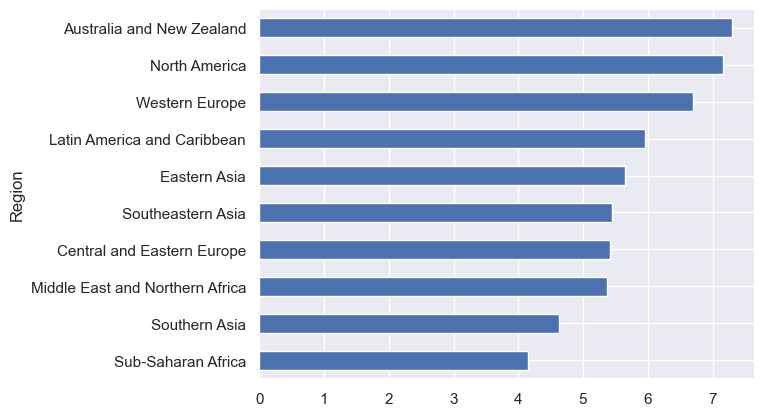

In [95]:
df17.groupby(by='Region').mean()['Happiness Score'].sort_values().plot(kind='barh')

In [96]:
region_lists=list(df17['Region'].unique())
region_happiness_ratio=[]
for each in region_lists:
    region=df17[df17['Region']==each]
    region_happiness_rate=sum(region["Happiness Score"])/len(region)
    region_happiness_ratio.append(region_happiness_rate)
    
data_happiness=pd.DataFrame({'region':region_lists,'region_happiness_ratio':region_happiness_ratio})
new_index_happiness=(data_happiness['region_happiness_ratio'].sort_values(ascending=False)).index.values
sorted_data_happiness = data_happiness.reindex(new_index_happiness)
sorted_data_happiness=sorted_data_happiness.round(2)
sorted_data_happiness

,region,region_happiness_ratio
2,Australia and New Zealand,7.30
1,North America,7.16
0,Western Europe,6.70
4,Latin America and Caribbean,5.96
7,Eastern Asia,5.64
6,Southeastern Asia,5.44
5,Central and Eastern Europe,5.41
3,Middle East and Northern Africa,5.37
9,Southern Asia,4.63
8,Sub-Saharan Africa,4.15


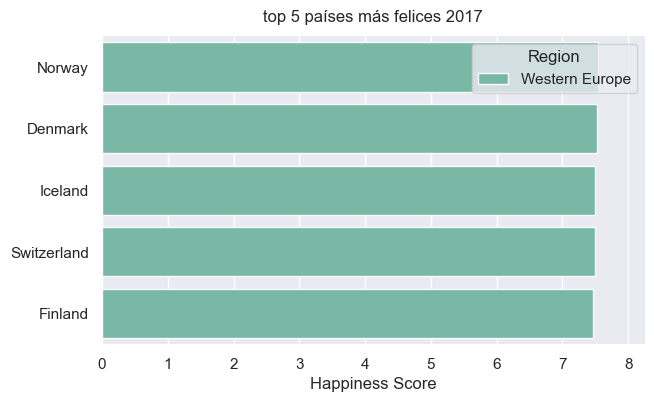

In [97]:


plt.figure(figsize=(7,4))
g = sns.barplot(data=top17, x='Happiness Score', y='Country', alpha=0.95, 
                hue='Region', dodge=False,
                palette='Set2')
g.set_title('top 5 países más felices 2017', y=1.02)
g.set(xlabel='Happiness Score',
      ylabel=None)
g.set_xlim(0, 8.25)
sns.despine(left=True, bottom=True, top=True)

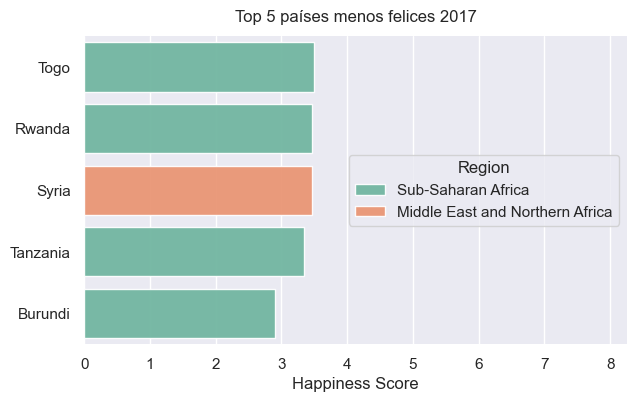

In [98]:


plt.figure(figsize=(7,4))
g = sns.barplot(data=notop17, x='Happiness Score', y='Country', alpha=0.95, 
                hue='Region', dodge=False,
                palette='Set2')
g.set_title('Top 5 países menos felices 2017', y=1.02)
g.set(xlabel='Happiness Score',
      ylabel=None)
g.set_xlim(0, 8.25)
sns.despine(left=True, bottom=True, top=True)

In [99]:
dfmap17 = px.data.gapminder()
figmap17 = px.choropleth(df17, locations="Country",locationmode="country names", color="Happiness Score", hover_name="Country")
figmap17.show()

In [100]:
figregion17 = px.bar(        
        df17,
        x = "Region",
        y = "Happiness Score",
        title = "Happiness Score por Región",
        color="Happiness Score")
figregion17

In [101]:
factorstop = df17.iloc[:,:]
        # Creating trace1
trace1 = go.Scatter(x = df17['Country'],
                    y = df17['Economy (GDP per Capita)'],
                    mode = "lines+markers",
                    name = "Economy",
                    marker = dict(color = 'red'),
                    text= df17.Country)

        # Creating trace2
trace2 = go.Scatter(x = df17['Country'],
                    y = df17['Health (Life Expectancy)'],
                    mode = "lines+markers",
                    name = "Health (Life Expectancy)",
                    marker = dict(color = 'blue'),
                    text= df17.Country)

        # Creating trace3
trace3 = go.Scatter(x = df17['Country'],
                    y = df17['Family'],
                    mode = "lines+markers",
                    name = "Family",
                    marker = dict(color = 'grey'),
                    text= df17.Country)

        # Creating trace4
trace4 = go.Scatter(x = df17['Country'],
                    y = df17["Freedom"],
                    mode = "lines+markers",
                    name = "Freedom",
                    marker = dict(color = 'black'),
                    text= df17.Country)

       
data = [trace1, trace2, trace3, trace4]
layout = dict(title = 'Comparación amplia factores más correlacionados 2017',
              xaxis= dict(title= 'Countries',ticklen= 4,zeroline= False),
              hovermode="x unified")
figfactores17 = dict(data = data,layout = layout)

iplot(figfactores17)

<AxesSubplot: xlabel='Health (Life Expectancy)', ylabel='Country'>

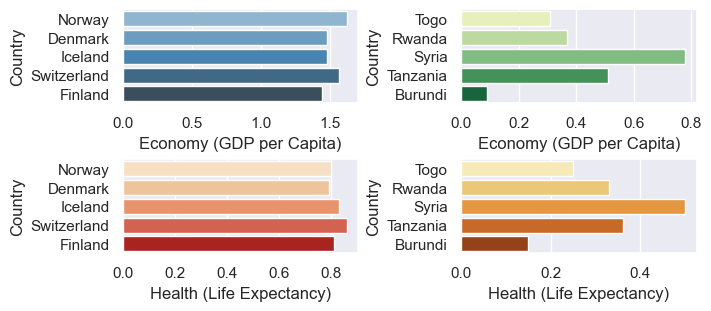

In [102]:

fig02, axes02 = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(7,3))
sns.barplot(x='Economy (GDP per Capita)',y='Country', data=top17, ax=axes02[0,0],palette="Blues_d")
sns.barplot(x='Economy (GDP per Capita)' ,y='Country', data=notop17, ax=axes02[0,1],palette="YlGn")
sns.barplot(x='Health (Life Expectancy)' ,y='Country', data=top17, ax=axes02[1,0],palette='OrRd')
sns.barplot(x='Health (Life Expectancy)' ,y='Country', data=notop17, ax=axes02[1,1],palette='YlOrBr')

<AxesSubplot: xlabel='Freedom', ylabel='Country'>

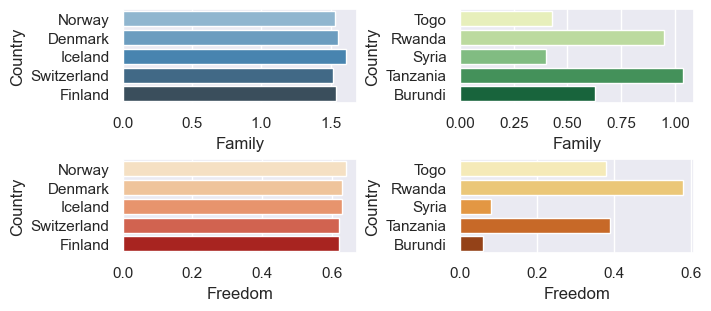

In [103]:
fig002, axes002 = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(7,3))
sns.barplot(x='Family',y='Country', data=top17, ax=axes002[0,0],palette="Blues_d")
sns.barplot(x='Family' ,y='Country', data=notop17, ax=axes002[0,1],palette="YlGn")
sns.barplot(x='Freedom' ,y='Country', data=top17, ax=axes002[1,0],palette='OrRd')
sns.barplot(x='Freedom' ,y='Country', data=notop17, ax=axes002[1,1],palette='YlOrBr')

# *Año 2018*

## 1. Análisis normalidad y correlación

In [104]:
test_norm = shapiro(df18["Happiness Score"])
print(f"El p-valor obtenido en el test de Shapiro es de {test_norm.pvalue}")

El p-valor obtenido en el test de Shapiro es de 0.12328071892261505


C:\Users\fara1\AppData\Local\Temp\ipykernel_15364\2906825848.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='Happiness Score', ylabel='Density'>

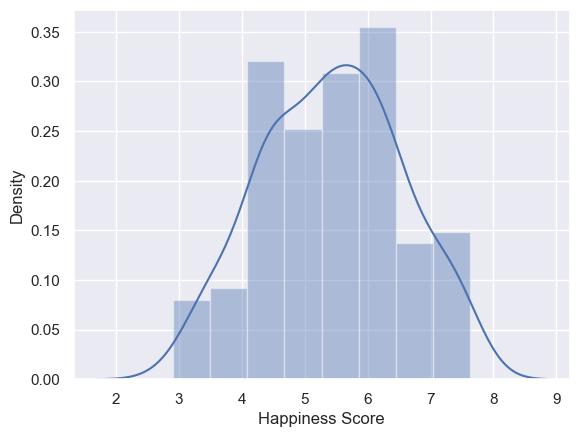

In [105]:
sns.distplot(df18["Happiness Score"])

C:\Users\fara1\AppData\Local\Temp\ipykernel_15364\3841200751.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot: >

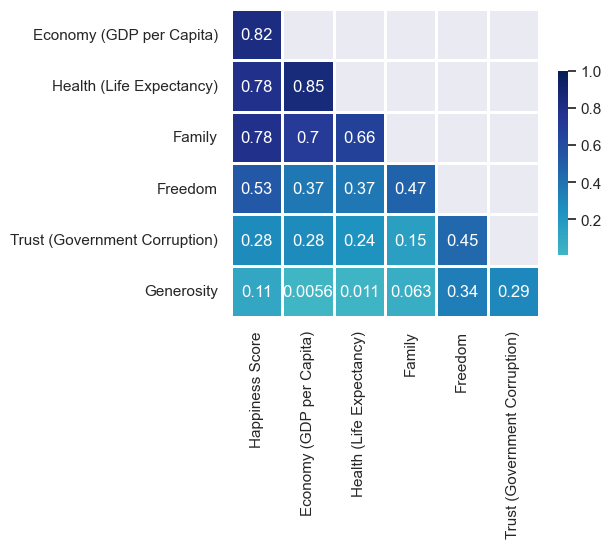

In [106]:
corr = df18.corr(method = 'spearman').sort_values(by = 'Happiness Score', axis = 0, ascending = False).sort_values(by = 'Happiness Score', axis = 1, ascending = False)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool)) # tri u o tri l para cambiar la forma
 # Set up the matplotlib figure
fig18, ax18 = plt.subplots(figsize=(5,4))
 # Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 # Draw the heatmap with the mask and correct aspect ratio
sns.set()
sns.heatmap(corr.iloc[1:7,0:6], mask=mask[1:7,0:6], cmap="YlGnBu", vmax=1, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .6}, annot = True)

## 2. Análisis Happiness Report

In [85]:
top18=df18.sort_values(by="Happiness Score", ascending=False).head()
notop18=df18.sort_values(by="Happiness Score", ascending=False).tail()

In [107]:
topfelices18 =px.histogram(top18,x="Happiness Score", y="Country", color= "Happiness Score", width=800, title="Top 5 países más felices")
topfelices18.show()

In [108]:
topnofelices18 =px.histogram(notop18,x="Happiness Score", y="Country", color= "Happiness Score", width=800, title="Top 5 países menos felices")
topnofelices18.show()

<AxesSubplot: ylabel='Region'>

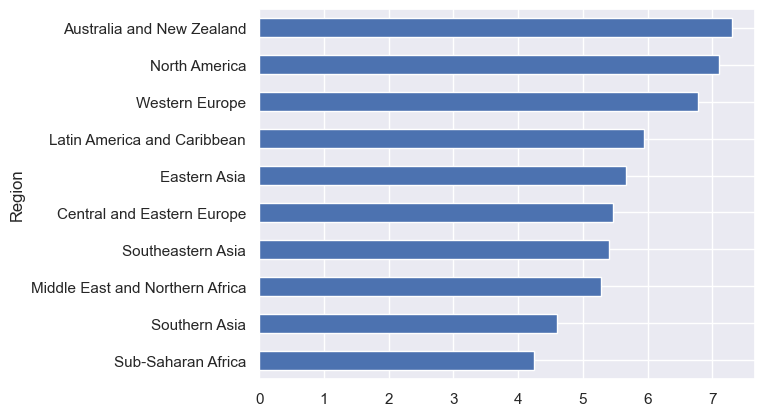

In [109]:
df18.groupby(by='Region').mean()['Happiness Score'].sort_values().plot(kind='barh')

In [110]:
region_lists=list(df18['Region'].unique())
region_happiness_ratio=[]
for each in region_lists:
    region=df18[df18['Region']==each]
    region_happiness_rate=sum(region["Happiness Score"])/len(region)
    region_happiness_ratio.append(region_happiness_rate)
    
data_happiness=pd.DataFrame({'region':region_lists,'region_happiness_ratio':region_happiness_ratio})
new_index_happiness=(data_happiness['region_happiness_ratio'].sort_values(ascending=False)).index.values
sorted_data_happiness = data_happiness.reindex(new_index_happiness)
sorted_data_happiness=sorted_data_happiness.round(2)
sorted_data_happiness

,region,region_happiness_ratio
2,Australia and New Zealand,7.30
1,North America,7.11
0,Western Europe,6.78
3,Latin America and Caribbean,5.95
6,Eastern Asia,5.67
5,Central and Eastern Europe,5.46
7,Southeastern Asia,5.40
4,Middle East and Northern Africa,5.28
9,Southern Asia,4.60
8,Sub-Saharan Africa,4.24


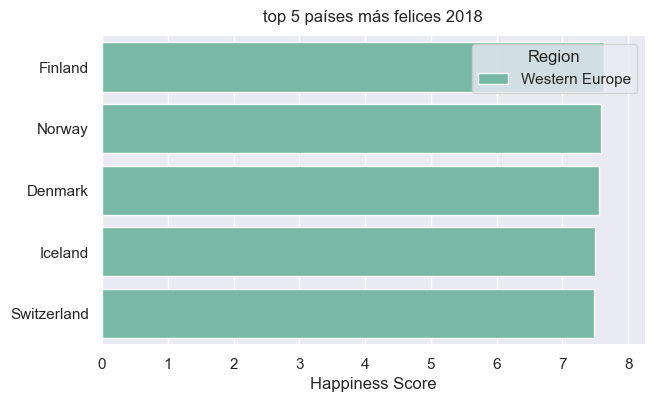

In [111]:


plt.figure(figsize=(7,4))
g = sns.barplot(data=top18, x='Happiness Score', y='Country', alpha=0.95, 
                hue='Region', dodge=False,
                palette='Set2')
g.set_title('top 5 países más felices 2018', y=1.02)
g.set(xlabel='Happiness Score',
      ylabel=None)
g.set_xlim(0, 8.25)
sns.despine(left=True, bottom=True, top=True)

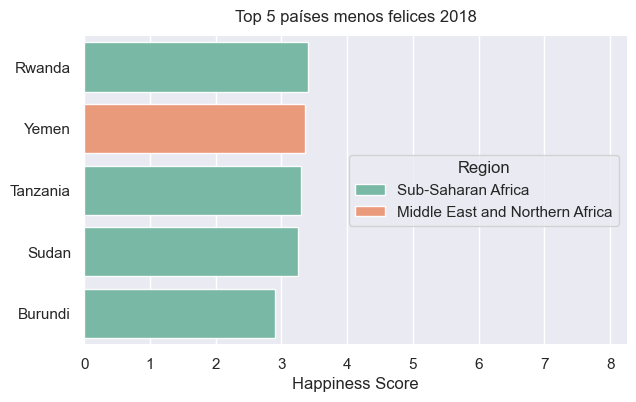

In [112]:


plt.figure(figsize=(7,4))
g = sns.barplot(data=notop18, x='Happiness Score', y='Country', alpha=0.95, 
                hue='Region', dodge=False,
                palette='Set2')
g.set_title('Top 5 países menos felices 2018', y=1.02)
g.set(xlabel='Happiness Score',
      ylabel=None)
g.set_xlim(0, 8.25)
sns.despine(left=True, bottom=True, top=True)

In [113]:
dfmap18 = px.data.gapminder()
figmap18 = px.choropleth(df18, locations="Country",locationmode="country names", color="Happiness Score", hover_name="Country")
figmap18.show()

In [114]:
figregion18 = px.bar(        
        df18,
        x = "Region",
        y = "Happiness Score",
        title = "Happiness Score por Región",
        color="Happiness Score")
figregion17

In [115]:
factorstop = df18.iloc[:,:]
        # Creating trace1
trace1 = go.Scatter(x = df18['Country'],
                    y = df18['Economy (GDP per Capita)'],
                    mode = "lines+markers",
                    name = "Economy",
                    marker = dict(color = 'red'),
                    text= df18.Country)

        # Creating trace2
trace2 = go.Scatter(x = df18['Country'],
                    y = df18['Health (Life Expectancy)'],
                    mode = "lines+markers",
                    name = "Health (Life Expectancy)",
                    marker = dict(color = 'blue'),
                    text= df18.Country)

        # Creating trace3
trace3 = go.Scatter(x = df18['Country'],
                    y = df18['Family'],
                    mode = "lines+markers",
                    name = "Family",
                    marker = dict(color = 'grey'),
                    text= df18.Country)

        # Creating trace4
trace4 = go.Scatter(x = df18['Country'],
                    y = df18["Freedom"],
                    mode = "lines+markers",
                    name = "Freedom",
                    marker = dict(color = 'black'),
                    text= df18.Country)

       
data = [trace1, trace2, trace3, trace4]
layout = dict(title = 'Comparación amplia factores más correlacionados 2018',
              xaxis= dict(title= 'Countries',ticklen= 4,zeroline= False),
              hovermode="x unified")
figfactores18 = dict(data = data,layout = layout)
iplot(figfactores18)

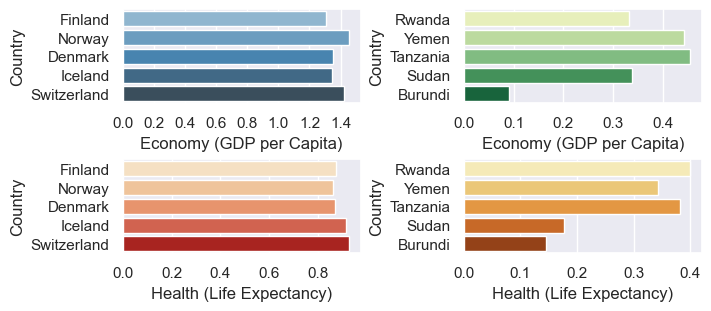

In [116]:

fig03, axes03 = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(7,3))
sns.barplot(x='Economy (GDP per Capita)',y='Country', data=top18, ax=axes03[0,0],palette="Blues_d")
sns.barplot(x='Economy (GDP per Capita)' ,y='Country', data=notop18, ax=axes03[0,1],palette="YlGn")
sns.barplot(x='Health (Life Expectancy)' ,y='Country', data=top18, ax=axes03[1,0],palette='OrRd')
sns.barplot(x='Health (Life Expectancy)' ,y='Country', data=notop18, ax=axes03[1,1],palette='YlOrBr')
sns.set(font_scale=0.6)
        

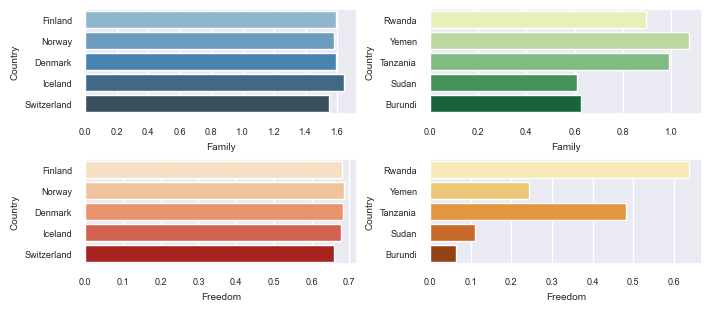

In [117]:
fig003, axes003 = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(7,3))
sns.barplot(x='Family',y='Country', data=top18, ax=axes003[0,0],palette="Blues_d")
sns.barplot(x='Family' ,y='Country', data=notop18, ax=axes003[0,1],palette="YlGn")
sns.barplot(x='Freedom' ,y='Country', data=top18, ax=axes003[1,0],palette='OrRd')
sns.barplot(x='Freedom' ,y='Country', data=notop18, ax=axes003[1,1],palette='YlOrBr')
sns.set(font_scale=0.6)


# *Año 2019*

## 1. Análisis normalidad y correlación

In [118]:
test_norm = shapiro(df19["Happiness Score"])
print(f"El p-valor obtenido en el test de Shapiro es de {test_norm.pvalue}")

El p-valor obtenido en el test de Shapiro es de 0.22127729654312134


C:\Users\fara1\AppData\Local\Temp\ipykernel_15364\1652836230.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='Happiness Score', ylabel='Density'>

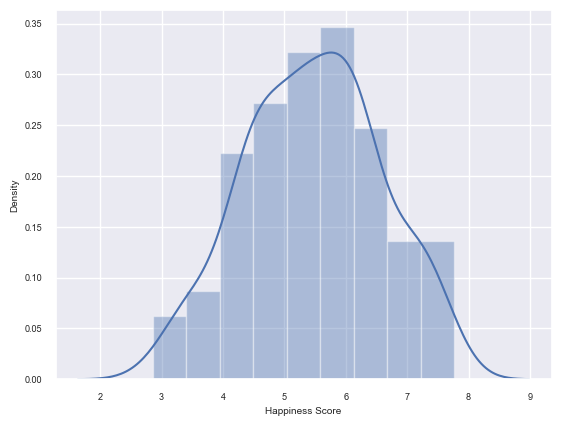

In [119]:
sns.distplot(df19["Happiness Score"])

C:\Users\fara1\AppData\Local\Temp\ipykernel_15364\2514713265.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot: >

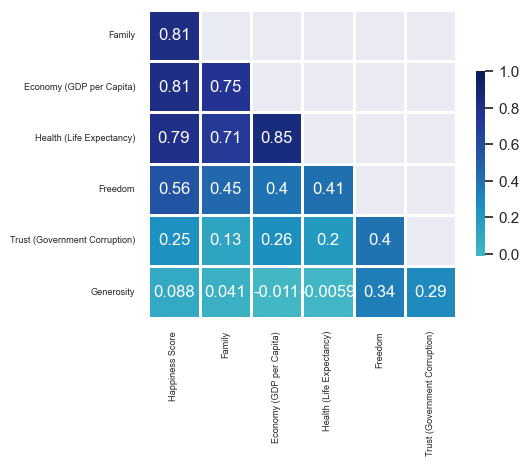

In [120]:
corr = df19.corr(method = 'spearman').sort_values(by = 'Happiness Score', axis = 0, ascending = False).sort_values(by = 'Happiness Score', axis = 1, ascending = False)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool)) # tri u o tri l para cambiar la forma
 # Set up the matplotlib figure
fig19, ax19 = plt.subplots(figsize=(5,4))
 # Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 # Draw the heatmap with the mask and correct aspect ratio
sns.set()
sns.heatmap(corr.iloc[1:7,0:6], mask=mask[1:7,0:6], cmap="YlGnBu", vmax=1, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .6}, annot = True)

## 2. Análisis Happiness Report

In [168]:
top19=df19.sort_values(by="Happiness Score", ascending=False).head()
top19

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
0,Finland,Western Europe,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,Denmark,Western Europe,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,Norway,Western Europe,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,Iceland,Western Europe,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,Netherlands,Western Europe,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


In [169]:
topfelices19 =px.histogram(top19,x="Happiness Score", y="Country", color= "Happiness Score", width=800, title="Top 5 países más felices")
topfelices19.show()

In [170]:
notop19=df19.sort_values(by="Happiness Score", ascending=False).tail()
notop19

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
143,Yemen,Middle East and Northern Africa,3.380,0.287,1.163,0.463,0.143,0.108,0.077,2019
144,Rwanda,Sub-Saharan Africa,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2019
145,Tanzania,Sub-Saharan Africa,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2019
146,Afghanistan,Southern Asia,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2019
147,Sudan,Sub-Saharan Africa,2.853,0.306,0.575,0.295,0.010,0.202,0.091,2019


In [171]:
topnofelices19 =px.histogram(notop19,x="Happiness Score", y="Country", color= "Happiness Score", width=800, title="Top 5 países menos felices")
topnofelices19.show()

<AxesSubplot: ylabel='Region'>

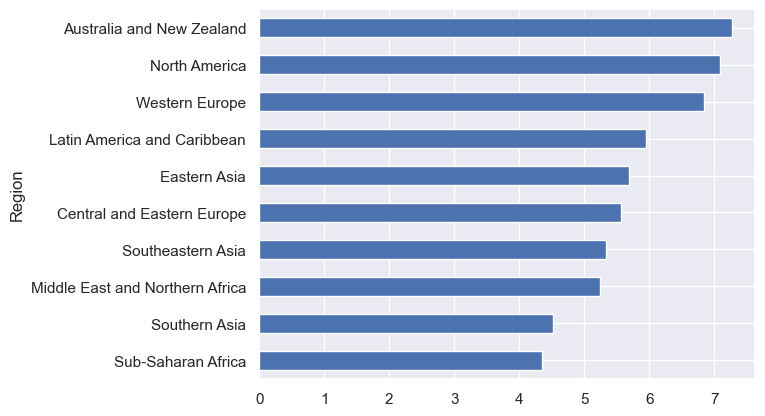

In [123]:
df19.groupby(by='Region').mean()['Happiness Score'].sort_values().plot(kind='barh')

In [124]:
region_lists=list(df19['Region'].unique())
region_happiness_ratio=[]
for each in region_lists:
    region=df19[df19['Region']==each]
    region_happiness_rate=sum(region["Happiness Score"])/len(region)
    region_happiness_ratio.append(region_happiness_rate)
    
data_happiness=pd.DataFrame({'region':region_lists,'region_happiness_ratio':region_happiness_ratio})
new_index_happiness=(data_happiness['region_happiness_ratio'].sort_values(ascending=False)).index.values
sorted_data_happiness = data_happiness.reindex(new_index_happiness)
sorted_data_happiness=sorted_data_happiness.round(2)
sorted_data_happiness

,region,region_happiness_ratio
1,Australia and New Zealand,7.27
2,North America,7.08
0,Western Europe,6.84
3,Latin America and Caribbean,5.95
6,Eastern Asia,5.69
5,Central and Eastern Europe,5.56
7,Southeastern Asia,5.33
4,Middle East and Northern Africa,5.24
9,Southern Asia,4.53
8,Sub-Saharan Africa,4.34


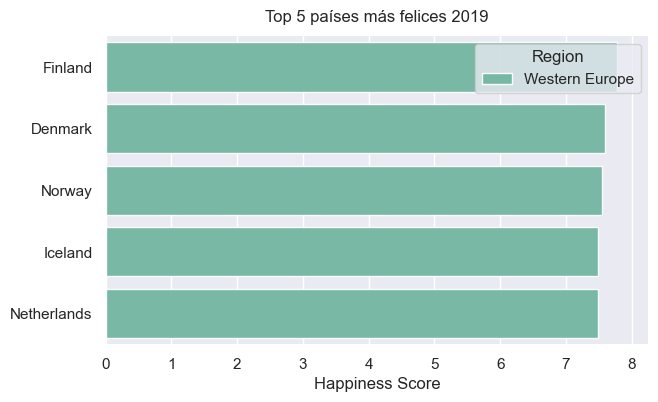

In [173]:
plt.figure(figsize=(7,4))
g = sns.barplot(data=top19, x='Happiness Score', y='Country', alpha=0.95, 
                hue='Region', dodge=False,
                palette='Set2')
g.set_title('Top 5 países más felices 2019', y=1.02)
g.set(xlabel='Happiness Score',
      ylabel=None)
g.set_xlim(0, 8.25)
sns.despine(left=True, bottom=True, top=True)

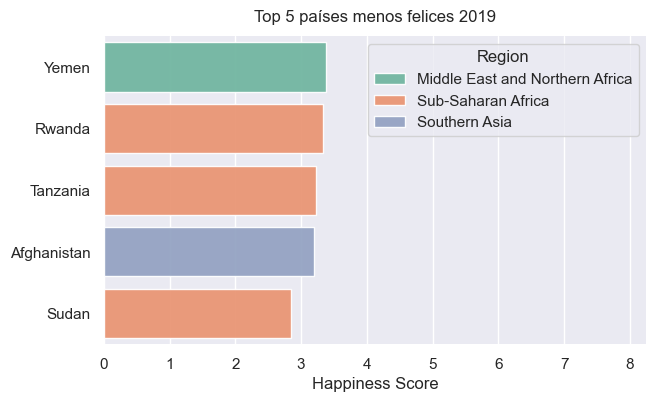

In [174]:
plt.figure(figsize=(7,4))
g = sns.barplot(data=notop19, x='Happiness Score', y='Country', alpha=0.95, 
                hue='Region', dodge=False,
                palette='Set2')
g.set_title('Top 5 países menos felices 2019', y=1.02)
g.set(xlabel='Happiness Score',
      ylabel=None)
g.set_xlim(0, 8.25)
sns.despine(left=True, bottom=True, top=True)

In [127]:
dfmap19 = px.data.gapminder()
figmap19 = px.choropleth(df19, locations="Country",locationmode="country names", color="Happiness Score", hover_name="Country")
figmap19.show()

In [128]:
figregion19 = px.bar(        
        df19,
        x = "Region",
        y = "Happiness Score",
        title = "Happiness Score por Región",
        color="Happiness Score")
figregion17

In [129]:
factorstop = df19.iloc[:,:]
        # Creating trace1
trace1 = go.Scatter(x = df19['Country'],
                    y = df19['Economy (GDP per Capita)'],
                    mode = "lines+markers",
                    name = "Economy",
                    marker = dict(color = 'red'),
                    text= df19.Country)

        # Creating trace2
trace2 = go.Scatter(x = df19['Country'],
                    y = df19['Health (Life Expectancy)'],
                    mode = "lines+markers",
                    name = "Health (Life Expectancy)",
                    marker = dict(color = 'blue'),
                    text= df19.Country)

        # Creating trace3
trace3 = go.Scatter(x = df19['Country'],
                    y = df19['Family'],
                    mode = "lines+markers",
                    name = "Family",
                    marker = dict(color = 'grey'),
                    text= df19.Country)

        # Creating trace4
trace4 = go.Scatter(x = df19['Country'],
                    y = df19["Freedom"],
                    mode = "lines+markers",
                    name = "Freedom",
                    marker = dict(color = 'black'),
                    text= df19.Country)

       
data = [trace1, trace2, trace3, trace4]
layout = dict(title = 'Comparación amplia factores más correlacionados 2019',
              xaxis= dict(title= 'Countries',ticklen= 4,zeroline= False),
              hovermode="x unified")
figfactores19 = dict(data = data,layout = layout)
iplot(figfactores19)

In [225]:
#DF con los 10 paises mas felices
top_10_2015 = df15.sort_values(by="Happiness Score", ascending=False).head(10)
top_10_2016 = df16.sort_values(by="Happiness Score", ascending=False).head(10)
top_10_2017 = df17.sort_values(by="Happiness Score", ascending=False).head(10)
top_10_2018 = df18.sort_values(by="Happiness Score", ascending=False).head(10)
top_10_2019 = df19.sort_values(by="Happiness Score", ascending=False).head(10)

In [226]:
#DF con los 10 paises mas felices
notop_10_2015 = df15.sort_values(by="Happiness Score", ascending=False).tail(10)
notop_10_2016 = df16.sort_values(by="Happiness Score", ascending=False).tail(10)
notop_10_2017 = df17.sort_values(by="Happiness Score", ascending=False).tail(10)
notop_10_2018 = df18.sort_values(by="Happiness Score", ascending=False).tail(10)
notop_10_2019 = df19.sort_values(by="Happiness Score", ascending=False).tail(10)

<AxesSubplot: xlabel='Health (Life Expectancy)', ylabel='Country'>

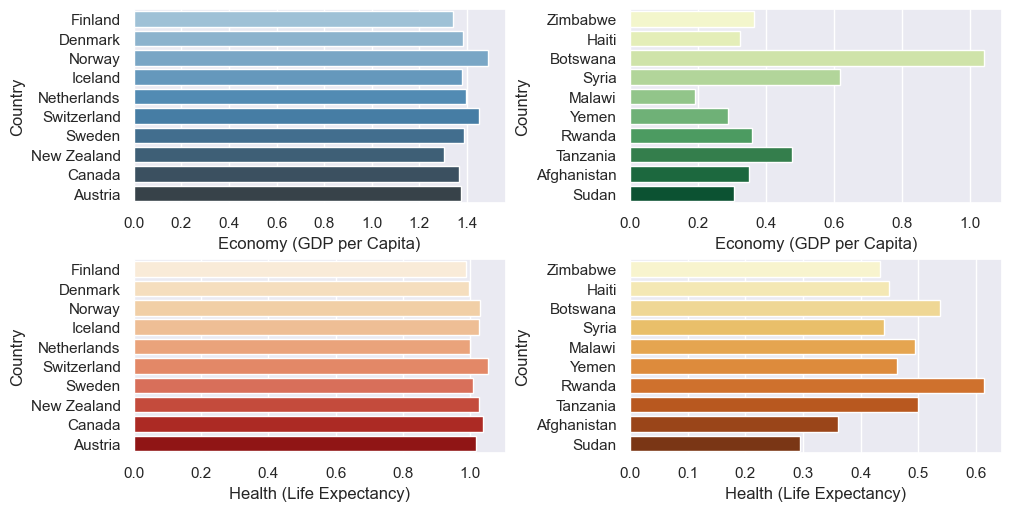

In [228]:
fig04, axes04 = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(10,5))
sns.barplot(x='Economy (GDP per Capita)',y='Country', data=top_10_2019, ax=axes04[0,0],palette="Blues_d")
sns.barplot(x='Economy (GDP per Capita)' ,y='Country', data=notop_10_2019, ax=axes04[0,1],palette="YlGn")
sns.barplot(x='Health (Life Expectancy)' ,y='Country', data=top_10_2019, ax=axes04[1,0],palette='OrRd')
sns.barplot(x='Health (Life Expectancy)' ,y='Country', data=notop_10_2019, ax=axes04[1,1],palette='YlOrBr')
        

<AxesSubplot: xlabel='Freedom', ylabel='Country'>

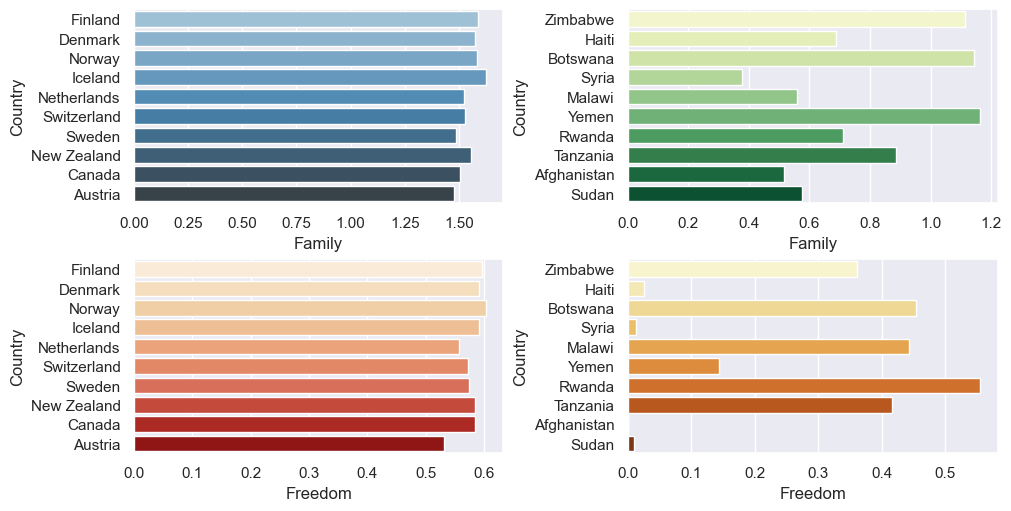

In [229]:
fig004, axes004 = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(10,5))
sns.barplot(x='Family',y='Country', data=top_10_2019, ax=axes004[0,0],palette="Blues_d")
sns.barplot(x='Family' ,y='Country', data=notop_10_2019, ax=axes004[0,1],palette="YlGn")
sns.barplot(x='Freedom' ,y='Country', data=top_10_2019, ax=axes004[1,0],palette='OrRd')
sns.barplot(x='Freedom' ,y='Country', data=notop_10_2019, ax=axes004[1,1],palette='YlOrBr')


# *Comparativo*

In [224]:
#DF con los 10 paises mas felices
top_10_2015 = df15.sort_values(by="Happiness Score", ascending=False).head(10)
top_10_2016 = df16.sort_values(by="Happiness Score", ascending=False).head(10)
top_10_2017 = df17.sort_values(by="Happiness Score", ascending=False).head(10)
top_10_2018 = df18.sort_values(by="Happiness Score", ascending=False).head(10)
top_10_2019 = df19.sort_values(by="Happiness Score", ascending=False).head(10)

In [214]:
# creating trace1
uno =go.Scatter(
                    y = top_10_2015['Country'],
                    x = top_10_2015['Happiness Score'],
                    mode = "markers",
                    name = "2015",
                    marker = dict(size= 10,color = 'red'),
                    text= top_10_2015.Country)
# # creating trace2
# dos =go.Scatter(
#                     y = top_5_2016['Country'],
#                     x = top_5_2016['Happiness Score'],
#                     mode = "markers",
#                     name = "2016",
#                     marker = dict(size= 10,color = 'green'),
#                     text= top_5_2015.Country)
# # creating trace3
# tres =go.Scatter(
#                     y = top_5_2017['Country'],
#                     x = top_5_2017['Happiness Score'],
#                     mode = "markers",
#                     name = "2017",
#                     marker = dict(size= 10,color = 'blue'),
#                     text= top_5_2015.Country)

# # creating trace4
# cuatro =go.Scatter(
#                     y = top_5_2018['Country'],
#                     x = top_5_2018['Happiness Score'],
#                     mode = "markers",
#                     name = "2018",
#                     marker = dict(size= 10,color = 'black'),
#                     text= top_5_2015.Country)

# creating trace5
cinco =go.Scatter(
                    y = top_10_2019['Country'],
                    x = top_10_2019['Happiness Score'],
                    mode = "markers",
                    name = "2019",
                    marker = dict(size= 10,color = 'green'),
                    text= top_10_2019.Country)


data = [uno, cinco]
layout = dict(title = "Evolución 2015-2019 top 10 más felices",
              xaxis= dict(title= 'Country',ticklen= 2,zeroline= False),
              yaxis= dict(title= 'Happiness',ticklen= 2,zeroline= False),
              hovermode="x unified"
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [209]:
#DF con los 10 paises mas felices
notop_10_2015 = df15.sort_values(by="Happiness Score", ascending=False).tail(10)
notop_10_2016 = df16.sort_values(by="Happiness Score", ascending=False).tail(10)
notop_10_2017 = df17.sort_values(by="Happiness Score", ascending=False).tail(10)
notop_10_2018 = df18.sort_values(by="Happiness Score", ascending=False).tail(10)
notop_10_2019 = df19.sort_values(by="Happiness Score", ascending=False).tail(10)

In [216]:
uno =go.Scatter(
                    y = notop_10_2015['Country'],
                    x = notop_10_2015['Happiness Score'],
                    mode = "markers",
                    name = "2015",
                    marker = dict(size= 10,color = 'red'),
                    text= notop_10_2015.Country)
# # creating trace2
# dos =go.Scatter(
#                     y = notop_5_2015['Country'],
#                     x = notop_5_2016['Happiness Score'],
#                     mode = "markers",
#                     name = "2016",
#                     marker = dict(size= 10,color = 'green'),
#                     text= notop_5_2015.Country)
# # creating trace3
# tres =go.Scatter(
#                     y = notop_5_2015['Country'],
#                     x = notop_5_2017['Happiness Score'],
#                     mode = "markers",
#                     name = "2017",
#                     marker = dict(size= 10,color = 'blue'),
#                     text= notop_5_2015.Country)

# # creating trace4
# cuatro =go.Scatter(
#                     y = notop_5_2015['Country'],
#                     x = notop_5_2018['Happiness Score'],
#                     mode = "markers",
#                     name = "2018",
#                     marker = dict(size= 10,color = 'black'),
#                     text= notop_5_2015.Country)

# creating trace5
cinco =go.Scatter(
                    y = notop_10_2019['Country'],
                    x = notop_10_2019['Happiness Score'],
                    mode = "markers",
                    name = "2019",
                    marker = dict(size= 10,color = 'green'),
                    text= notop_10_2019.Country)


data = [uno, cinco]
layout = dict(title = "Evolución 2015-2019 top 10 menos felices",
              xaxis= dict(title= 'Country',ticklen= 2,zeroline= False),
              yaxis= dict(title= 'Happiness',ticklen= 2,zeroline= False),
              hovermode="x unified"
             )
fig = dict(data = data, layout = layout)
iplot(fig)

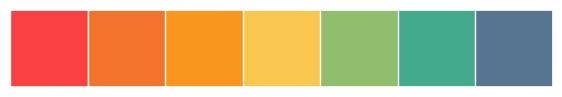

In [137]:
#Colors to be used in the plots
color=["#f94144","#f3722c","#f8961e","#f9c74f","#90be6d","#43aa8b","#577590"]
sns.palplot(color)

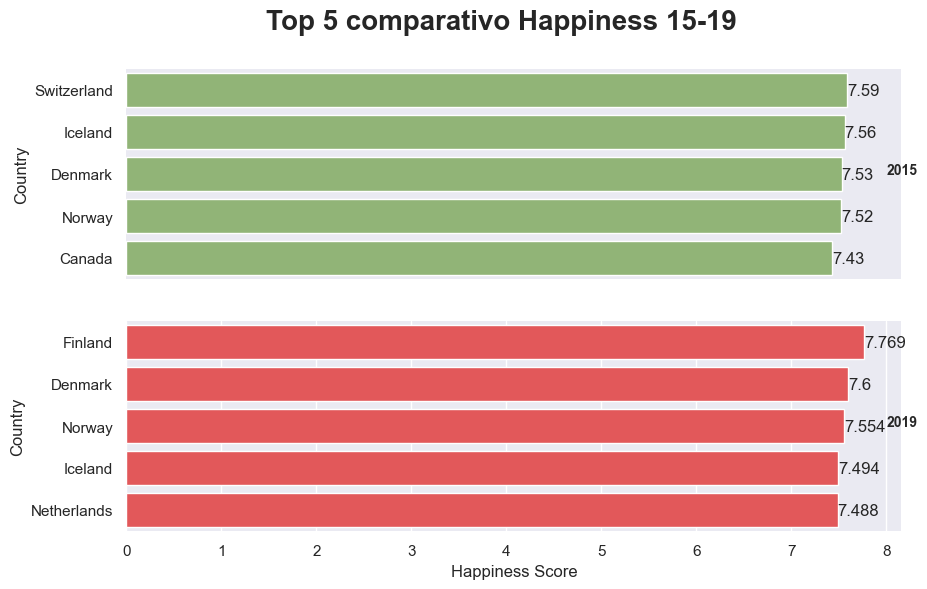

In [223]:
#top 5 15 vs 19
fig= plt.figure(figsize=(10,6))
g=gs.GridSpec(ncols=1, nrows=2, figure=fig)
plt.suptitle("Top 5 comparativo Happiness 15-19", weight='bold', size=20)

ax1=plt.subplot(g[0,0])
ax1=sns.barplot(data=top15, x=top15['Happiness Score'],y=top15['Country'], color=color[4])
ax1.xaxis.set_visible(False)
ax1.annotate("2015",xy=(8,2), weight='bold', size=10)
ax1.bar_label(ax1.containers[0])

ax2=plt.subplot(g[1,0], sharex=ax1)
ax2=sns.barplot(data=top19, x=top19['Happiness Score'],y=top19['Country'], color=color[0])
ax2.annotate("2019",xy=(8,2), weight='bold', size=10)
ax2.bar_label(ax2.containers[0])
for s in ['left','right','top','bottom']:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)

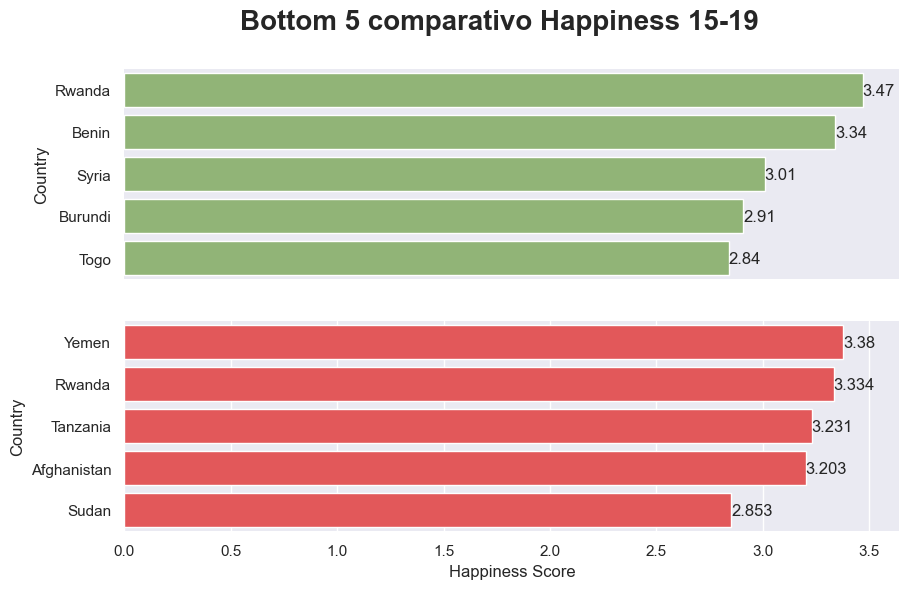

In [222]:
#But 5 15 vs 19
fig= plt.figure(figsize=(10,6))
g=gs.GridSpec(ncols=1, nrows=2, figure=fig)
plt.suptitle("Bottom 5 comparativo Happiness 15-19", weight='bold', size=20)
ax1=plt.subplot(g[0,0])
ax1=sns.barplot(data=notop15, x=notop15['Happiness Score'],y=notop15['Country'], color=color[4])
ax1.xaxis.set_visible(False)
ax1.annotate("2015",xy=(8,2), weight='bold', size=10)
ax1.bar_label(ax1.containers[0])

ax2=plt.subplot(g[1,0], sharex=ax1)
ax2=sns.barplot(data=notop19, x=notop19['Happiness Score'],y=notop19['Country'], color=color[0])
ax2.annotate("2019",xy=(8,2), weight='bold', size=10)
ax2.bar_label(ax2.containers[0])
for s in ['left','right','top','bottom']:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)

Fuente de consulta (Gracias!!)

BATTAL UÇAR kaggle

geeksforgeeks

MADHAN CHANDRASEKHARAN Kaggle World Happiness Report 2021

"Coding is fun youtube"

DRBEANESP21 kaggle
